In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'
validation_dir ='/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'

In [3]:
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [4]:
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(train_pneumonia_names[:10])

['IM-0531-0001-0001.jpeg', 'NORMAL2-IM-1073-0001.jpeg', 'NORMAL2-IM-0899-0001.jpeg', 'IM-0750-0001.jpeg', 'IM-0538-0001.jpeg', 'NORMAL2-IM-1214-0001.jpeg', 'IM-0568-0001.jpeg', 'NORMAL2-IM-0936-0001.jpeg', 'NORMAL2-IM-0908-0001.jpeg', 'IM-0501-0001.jpeg']
['person619_virus_1190.jpeg', 'person30_bacteria_145.jpeg', 'person373_bacteria_1707.jpeg', 'person28_bacteria_141.jpeg', 'person1455_virus_2488.jpeg', 'person1145_virus_1905.jpeg', 'person1678_bacteria_4446.jpeg', 'person1677_bacteria_4443.jpeg', 'person952_bacteria_2877.jpeg', 'person995_bacteria_2923.jpeg']


In [5]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal-rays :', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 1342
total training Pneumonia x-rays: 3876
total validation normal-rays : 234
total validation Pneumonia x-rays: 390


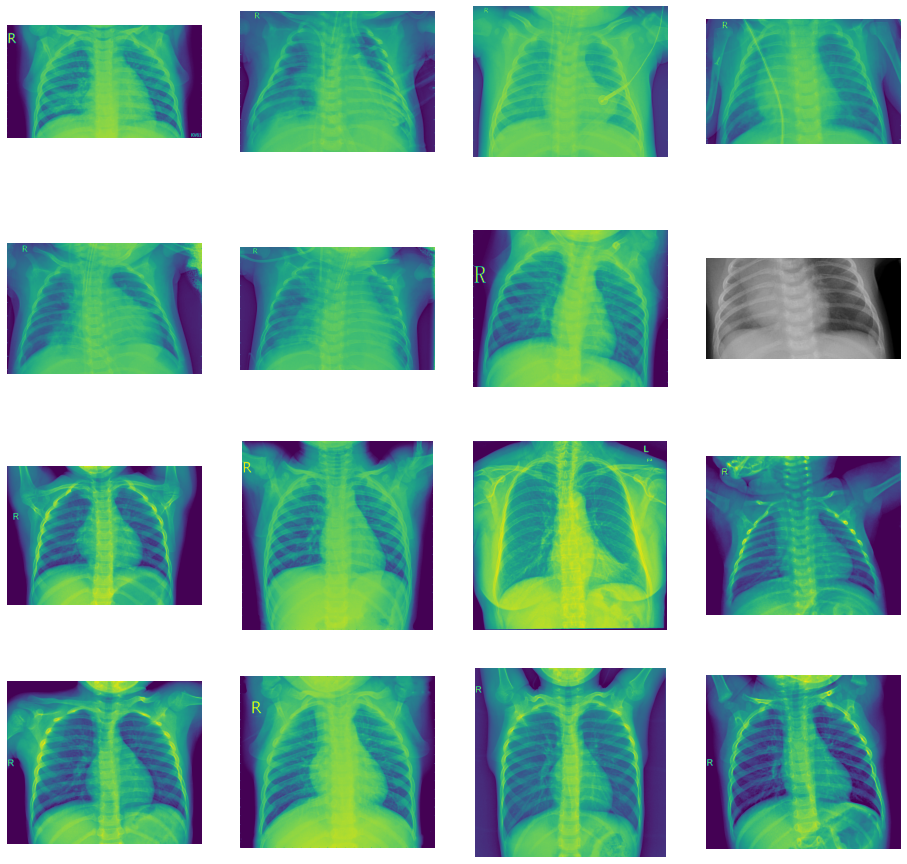

In [6]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index = 8

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pneumonia_pix+next_normal_pix):
  # Set up subplot; subplot indices start at 1
  ax = plt.subplot(nrows, ncols, i + 1)
  ax.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
from keras import regularizers
from keras.layers.core import Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [10]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
validation_data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_data_generator.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = validation_data_generator.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,
epochs = 10,
validation_data = validation_generator
)

Epoch 1/10
163/163 [==============================] - 115s 703ms/step - loss: 0.5627 - accuracy: 0.7452 - val_loss: 0.4880 - val_accuracy: 0.7821
Epoch 2/10
163/163 [==============================] - 100s 611ms/step - loss: 0.3519 - accuracy: 0.8499 - val_loss: 0.3774 - val_accuracy: 0.8221
Epoch 3/10
163/163 [==============================] - 99s 609ms/step - loss: 0.2334 - accuracy: 0.9009 - val_loss: 0.9701 - val_accuracy: 0.6554
Epoch 4/10
163/163 [==============================] - 103s 633ms/step - loss: 0.1828 - accuracy: 0.9289 - val_loss: 0.4639 - val_accuracy: 0.7965
Epoch 5/10
163/163 [==============================] - 100s 615ms/step - loss: 0.1573 - accuracy: 0.9400 - val_loss: 1.3474 - val_accuracy: 0.6330
Epoch 6/10
163/163 [==============================] - 99s 608ms/step - loss: 0.1465 - accuracy: 0.9434 - val_loss: 1.8013 - val_accuracy: 0.6298
Epoch 7/10
163/163 [==============================] - 98s 602ms/step - loss: 0.1316 - accuracy: 0.9521 - val_loss: 0.9562 - va

Text(0.5, 0, 'epoch')

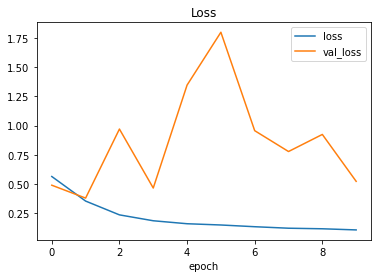

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

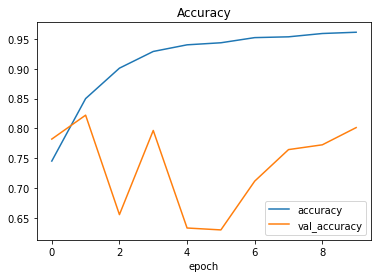

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
img = load_image('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("It's X-Ray of patient having Pneumonia.")
else:
  print("It's X-Ray of a Normal Patient.")

It's X-Ray of patient having Pneumonia.


In [16]:
model.save("pneumonia_model.h5")